# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

reviews
0  Not Verified |  This recent long-haul experien...
1  ✅ Trip Verified |   Check-in was slow with onl...
2  Not Verified |  Check in was smooth enough. Bo...
3  ✅ Trip Verified | Although transferring to thi...
4  ✅ Trip Verified |   We are extremely grateful ...
5  ✅ Trip Verified |   I had an appalling experie...
6  Not Verified |  Good points, the cabin crew, t...
7  Not Verified |  It was a decent flight, reason...
8  ✅ Trip Verified |   I really like flying Briti...
9  ✅ Trip Verified |   Could not book online the ...

In [4]:
reviews

['Not Verified |  This recent long-haul experience was disappointing. The customer service during boarding was poor, and things only declined from there. The aircraft felt outdated, with uncomfortable seats and no amenity kits — basic comforts you’d normally expect on a long-haul flight. The food quality was subpar, and the service was minimal, with just one proper drinks round for the entire journey and only warm juice offered afterwards. It’s clear that cost-cutting measures at BA are impacting the passenger experience far too much.',
 '✅ Trip Verified |   Check-in was slow with only one staff member checking in economy class in the initial period. After passport control, in the security check area, the flight was shown as cancelled. Back we, and others, went to the check-in counter where the staff seemed uninterested in the confusion caused. "It\'s not cancelled," they said, "Go back to security"  where the flight was still shown as cancelled. Once aboard the cancelled but not cance

In [5]:
import os

# Create the 'data' directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Save your file in the directory
file_path = os.path.join("data", "your_file.txt")
with open(file_path, "w") as file:
    file.write("Your data here")


In [6]:
df.to_csv("data/BA_reviews.csv")

The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

Data Collection


In this phase we will collect the customer ratings data from the airline quality website called Skytrax. We will collect data about airline ratings, seat ratings and lounge experience ratings from this website

In [7]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [8]:
pip install html5lib


Note: you may need to restart the kernel to use updated packages.


In [9]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html5")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 34
Error on page 35


In [10]:
#check the length of total reviews extracted
len(reviews)

3500

In [11]:
len(country)

3500

In [12]:
len(date)

3500

In [15]:
#check the length 
stars = stars[:3500]

In [16]:
#create  a dataframe from these collected lists of data

df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

In [17]:
df.head()

reviews  \
0  Not Verified |  This recent long-haul experien...   
1  ✅ Trip Verified |   Check-in was slow with onl...   
2  Not Verified |  Check in was smooth enough. Bo...   
3  ✅ Trip Verified | Although transferring to thi...   
4  ✅ Trip Verified |   We are extremely grateful ...   

                         stars           date         country  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t5  27th May 2025  United Kingdom  
1                            2  20th May 2025       Australia  
2                            6  18th May 2025  United Kingdom  
3                            4  15th May 2025   United States  
4                            8   8th May 2025     Switzerland

In [18]:
df.shape

(3500, 4)

Export the data into a csv format

In [19]:
import os

cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")

Data Cleaning

Now since we have extracted data from the website, it is not cleaned and ready to be analyzed yet. The reviews section will need to be cleaned for punctuations, spellings and other characters.

In [20]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
#regex
import re

In [21]:
#create a dataframe from csv file

cwd = os.getcwd()

df = pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)

In [22]:
df.head()

reviews  stars           date  \
0  Not Verified |  This recent long-haul experien...    5.0  27th May 2025   
1  ✅ Trip Verified |   Check-in was slow with onl...    2.0  20th May 2025   
2  Not Verified |  Check in was smooth enough. Bo...    6.0  18th May 2025   
3  ✅ Trip Verified | Although transferring to thi...    4.0  15th May 2025   
4  ✅ Trip Verified |   We are extremely grateful ...    8.0   8th May 2025   

          country  
0  United Kingdom  
1       Australia  
2  United Kingdom  
3   United States  
4     Switzerland

We will also create a column which mentions if the user is verified or not.

In [24]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [25]:

df['verified']

0       False
1        True
2       False
3        True
4        True
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

Cleaning Reviews

We will extract the column of reviews into a separate dataframe and clean it for semantic analysis

In [26]:
import nltk

# Download stopwords dataset
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to C:\Users\visnu
[nltk_data]     srithar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\visnu
[nltk_data]     srithar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
#for lemmatization of words we will use nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()


reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [28]:
# add the corpus to the original dataframe

df['corpus'] = corpus

In [29]:
df.head()

reviews  stars           date  \
0  Not Verified |  This recent long-haul experien...    5.0  27th May 2025   
1  ✅ Trip Verified |   Check-in was slow with onl...    2.0  20th May 2025   
2  Not Verified |  Check in was smooth enough. Bo...    6.0  18th May 2025   
3  ✅ Trip Verified | Although transferring to thi...    4.0  15th May 2025   
4  ✅ Trip Verified |   We are extremely grateful ...    8.0   8th May 2025   

          country  verified                                             corpus  
0  United Kingdom     False  verified recent long haul experience disappoin...  
1       Australia      True  check slow one staff member checking economy c...  
2  United Kingdom     False  verified check smooth enough boarding chaotic ...  
3   United States      True  although transferring flight heathrow budapest...  
4     Switzerland      True  extremely grateful crew flight ba cape town he...

Cleaning/Format date

In [30]:
df.dtypes

reviews      object
stars       float64
date         object
country      object
verified       bool
corpus       object
dtype: object

In [31]:
print(df.columns)  # Ensure 'date' exists


Index(['reviews', 'stars', 'date', 'country', 'verified', 'corpus'], dtype='object')


In [33]:
# convert the date to datetime format
df['date'] = pd.to_datetime(df['date'], format='%dth %B %Y', errors='coerce')

In [34]:
df.head()

reviews  stars       date  \
0  Not Verified |  This recent long-haul experien...    5.0 2025-05-27   
1  ✅ Trip Verified |   Check-in was slow with onl...    2.0 2025-05-20   
2  Not Verified |  Check in was smooth enough. Bo...    6.0 2025-05-18   
3  ✅ Trip Verified | Although transferring to thi...    4.0 2025-05-15   
4  ✅ Trip Verified |   We are extremely grateful ...    8.0 2025-05-08   

          country  verified                                             corpus  
0  United Kingdom     False  verified recent long haul experience disappoin...  
1       Australia      True  check slow one staff member checking economy c...  
2  United Kingdom     False  verified check smooth enough boarding chaotic ...  
3   United States      True  although transferring flight heathrow budapest...  
4     Switzerland      True  extremely grateful crew flight ba cape town he...

Cleaning ratings with stars

In [35]:
#check for unique values
df.stars.unique()

array([ 5.,  2.,  6.,  4.,  8., 10.,  3.,  1.,  7.,  9., nan])

In [36]:
df.stars.value_counts()

stars
1.0     894
2.0     405
3.0     401
8.0     336
7.0     274
10.0    273
9.0     266
5.0     243
4.0     236
6.0     171
Name: count, dtype: int64

In [37]:
# drop the rows where the value of ratings is None
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

Check for null Values

In [38]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     2770
                True   False    False     False      728
                False  True     False     False        1
         True   True   False    False     False        1
Name: count, dtype: int64

In [39]:
df.country.isnull().value_counts()

country
False    3499
True        1
Name: count, dtype: int64

In [40]:
#drop the rows using index where the country value is null
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [41]:
df.shape

(3499, 6)

In [42]:
#resetting the index
df.reset_index(drop=True)

reviews  stars       date  \
0     Not Verified |  This recent long-haul experien...    5.0 2025-05-27   
1     ✅ Trip Verified |   Check-in was slow with onl...    2.0 2025-05-20   
2     Not Verified |  Check in was smooth enough. Bo...    6.0 2025-05-18   
3     ✅ Trip Verified | Although transferring to thi...    4.0 2025-05-15   
4     ✅ Trip Verified |   We are extremely grateful ...    8.0 2025-05-08   
...                                                 ...    ...        ...   
3494  LAX-LHR-LAX on the A380.The first thing I noti...    7.0 2014-12-10   
3495  Phoenix to London - outbound a wonderful and e...    1.0 2014-12-10   
3496  LHR to IST in economy. Excellent! I thought it...    7.0 2014-12-10   
3497  LHR-SFO-LHR. Out in economy and return in econ...    8.0 2014-12-04   
3498  I feel as though I am the only traveller in th...    6.0 2014-12-04   

             country  verified  \
0     United Kingdom     False   
1          Australia      True   
2     United Kingdom     False   
3      United States      True   
4        Switzerland      True   
...              ...       ...   
3494   United States     False   
3495   United States     False   
3496  United Kingdom     False   
3497  United Kingdom     False   
3498  United Kingdom     False   

                                                 corpus  
0     verified recent long haul experience disappoin...  
1     check slow one staff member checking economy c...  
2     verified check smooth enough boarding chaotic ...  
3     although transferring flight heathrow budapest...  
4     extremely grateful crew flight ba cape town he...  
...                                                 ...  
3494  lax lhr lax first thing noticed longer upgrade...  
3495  phoenix london outbound wonderful enjoyable ex...  
3496  lhr ist economy excellent thought new fa told ...  
3497  lhr sfo lhr economy return economy plus outbou...  
3498  feel though traveller world enjoyed experience...  

[3499 rows x 6 columns]

Now our data is all cleaned and ready for data visualization and data analysis.

In [43]:
# export the cleaned data

df.to_csv(cwd + "/cleaned-BA-reviews.csv")

EXPLORATORY DATA ANALYSIS

In [44]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import os


from wordcloud import WordCloud,STOPWORDS

In [46]:
cwd = os.getcwd()

df = pd.read_csv(cwd+ "/cleaned-BA-reviews.csv", index_col=0)
df=df.reset_index(drop=True)

In [47]:
df.head()

reviews  stars        date  \
0  Not Verified |  This recent long-haul experien...    5.0  2025-05-27   
1  ✅ Trip Verified |   Check-in was slow with onl...    2.0  2025-05-20   
2  Not Verified |  Check in was smooth enough. Bo...    6.0  2025-05-18   
3  ✅ Trip Verified | Although transferring to thi...    4.0  2025-05-15   
4  ✅ Trip Verified |   We are extremely grateful ...    8.0  2025-05-08   

          country  verified                                             corpus  
0  United Kingdom     False  verified recent long haul experience disappoin...  
1       Australia      True  check slow one staff member checking economy c...  
2  United Kingdom     False  verified check smooth enough boarding chaotic ...  
3   United States      True  although transferring flight heathrow budapest...  
4     Switzerland      True  extremely grateful crew flight ba cape town he...

What is the average overall rating given for British Airways?

In [48]:
df.stars.mean()

4.521154945683247

What is the total counts for each ratings?

Text(0.5, 0.98, 'Counts for each ratings')

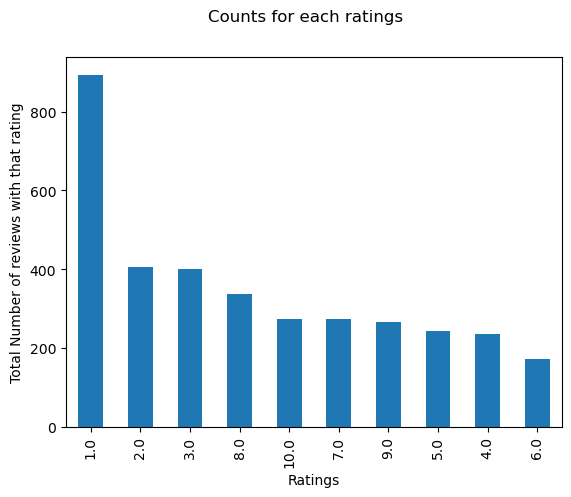

In [49]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [50]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

71 unique countries


Which country most review comes from?

In [51]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [52]:
df_country_review.rename(columns={'index': 'country', 'country': 'total_reviews'}, inplace=True)
df_country_review.columns = ['country', 'total_reviews']


In [53]:
print(df_country_review.head())  # Check if 'country' exists


          country  total_reviews
0  United Kingdom           2168
1   United States            418
2       Australia            137
3          Canada            108
4         Germany             66


Text(0.5, 1.0, 'Maximum number of review by country')

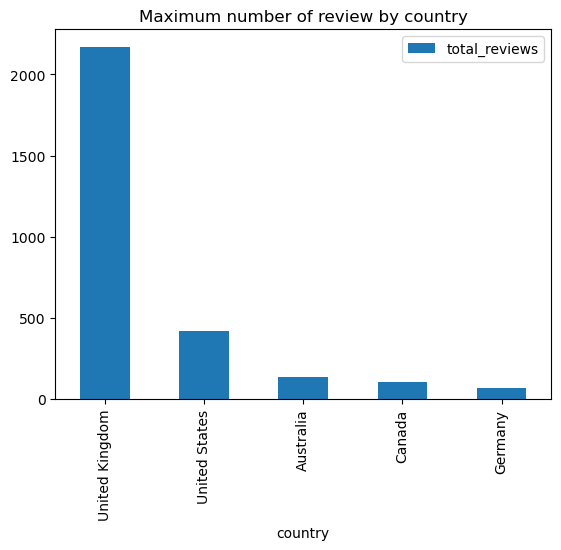

In [54]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

Which country provided on average highest ratings?

In [55]:
df_country_rating = df.groupby('country')['stars'].mean().sort_values(ascending=False).reset_index()


In [56]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

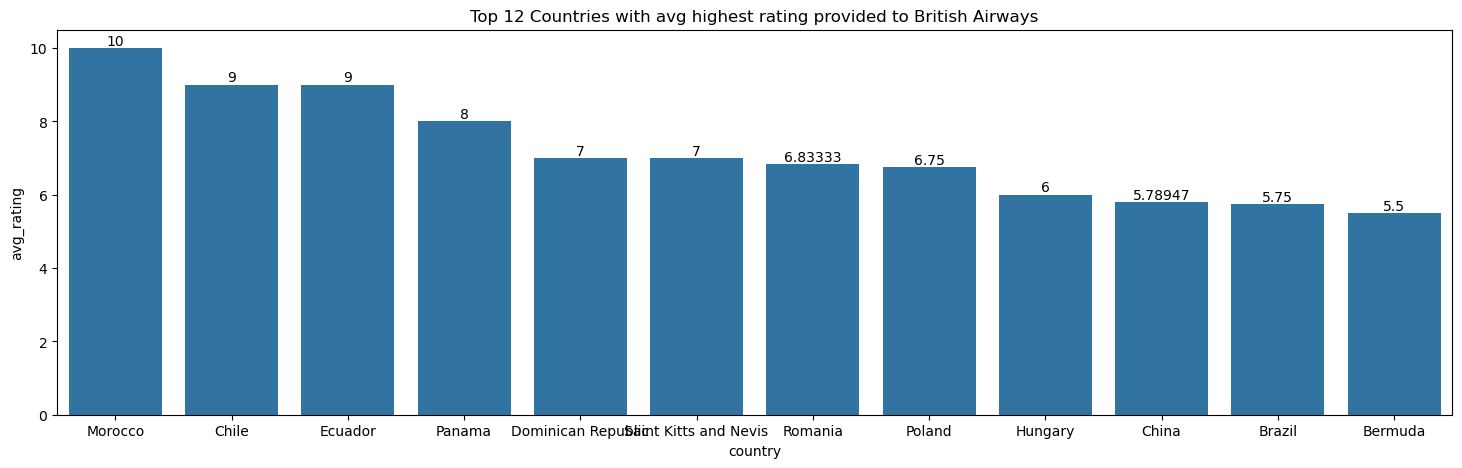

In [57]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

Time Series Analysis

In [59]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

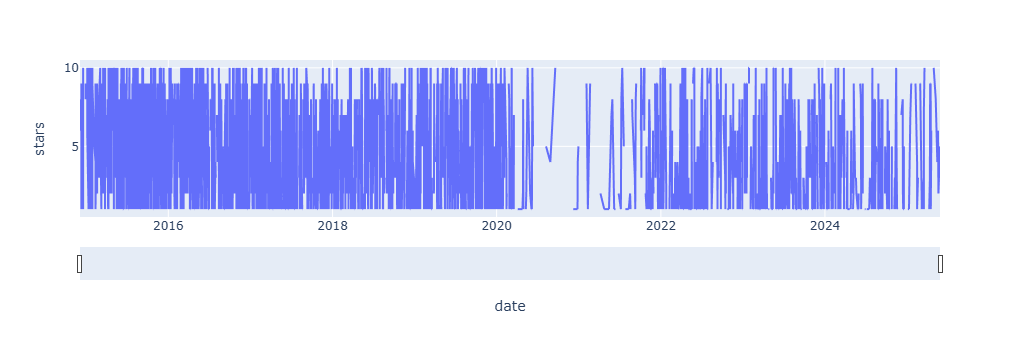

In [61]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

It can be seen that between April 2020 to August 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot

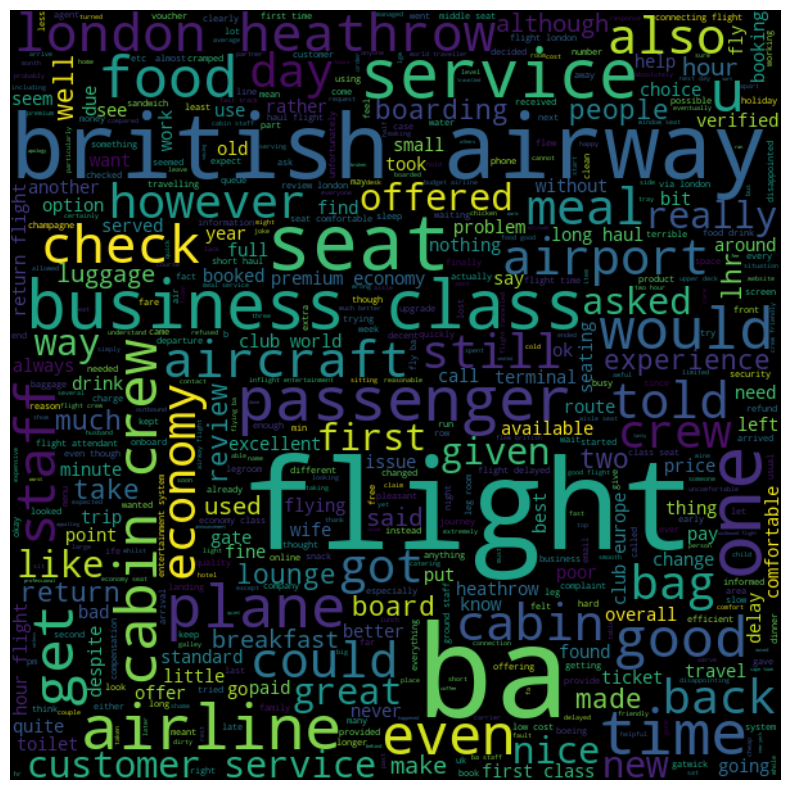

In [62]:
from nltk.corpus import stopwords
#start the one review
reviews=" ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords=set(stopwords.words('english'))

#create and genereate a word cloud image
wordcloud = WordCloud(height=600,width=600,max_font_size=100,max_words=500, stopwords=stopwords).generate(reviews)

#display a genarated image
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

There are many words that does not set the idea of whether the review is postive or negative. for example words like 'passenger','flight',etc.does not add conclusive value hence we can include them ih stopwords list

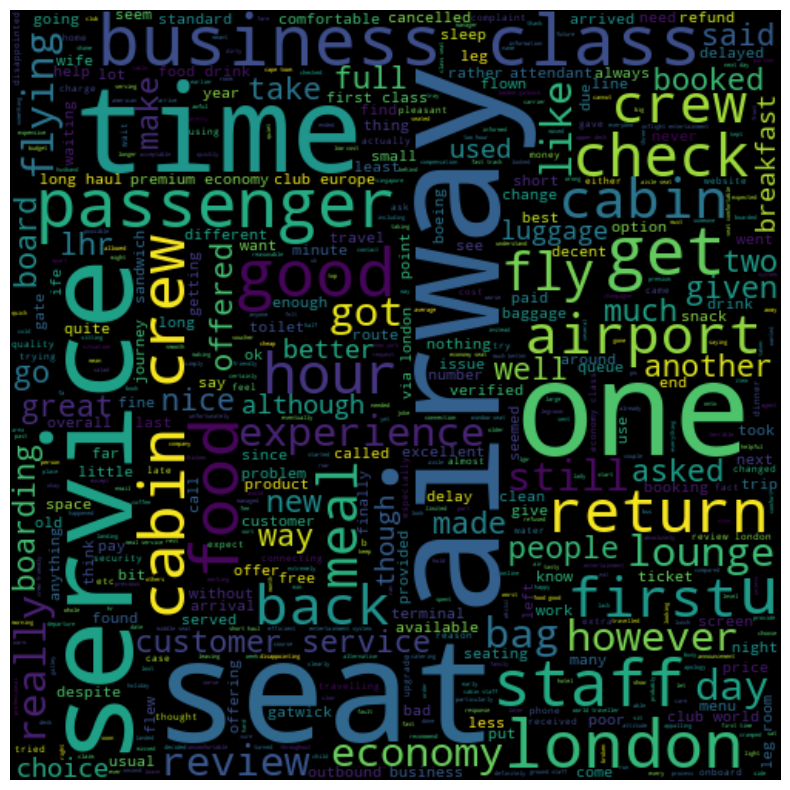

In [63]:
from nltk.corpus import stopwords
#start the one review
reviews=" ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords=set(stopwords.words('english'))
stopwords.update(["ba","flight","british","airline","plane","told","also","passenger"\
                 "london","heathrow","aircraft","could","even","would"])

#create and genereate a word cloud image
wordcloud = WordCloud(height=500,width=500,max_font_size=100,max_words=500, stopwords=stopwords).generate(reviews)

#display a genarated image
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

word frequency

seat        4161
service     2863
time        2324
food        2127
crew        2053
cabin       1906
class       1873
hour        1872
good        1867
airline     1756
business    1547
staff       1485
economy     1323
check       1280
drink       1128
meal        1106
lounge      1020
customer    1003
return      1000
club         987
dtype: int64


C:\Users\visnu srithar\AppData\Local\Temp\ipykernel_2128\4080302923.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




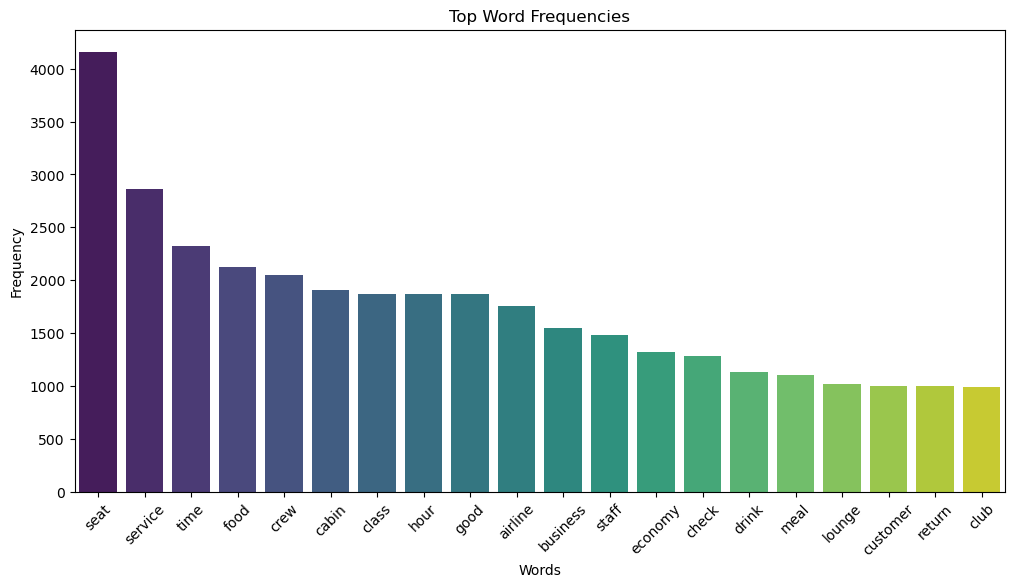

In [64]:
from nltk import ngrams 
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

words=reviews.split(" ")

stopwords=text.ENGLISH_STOP_WORDS.union(['flight','ba','passenger','u','london','airway','heathrow','plane','1hr','review','british','airway'])

new_words=[word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

all_fdist=pd.Series(dict(nlp_words))
print(all_fdist)
plt.figure(figsize=(12, 6))
sns.barplot(x=all_fdist.index, y=all_fdist.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Word Frequencies")
plt.show()

This gives us glimpes of what customer are really talking about here .we see that seat is most talked about the airline followed by"service", and "food" which are all very important to customers in terms of service .however we still do not know is how they are expressing about each of this service.to bring some significane to these terms we will use ngrams plots to see if they are bad or good in experience

word frequency with n-gram

<Axes: >

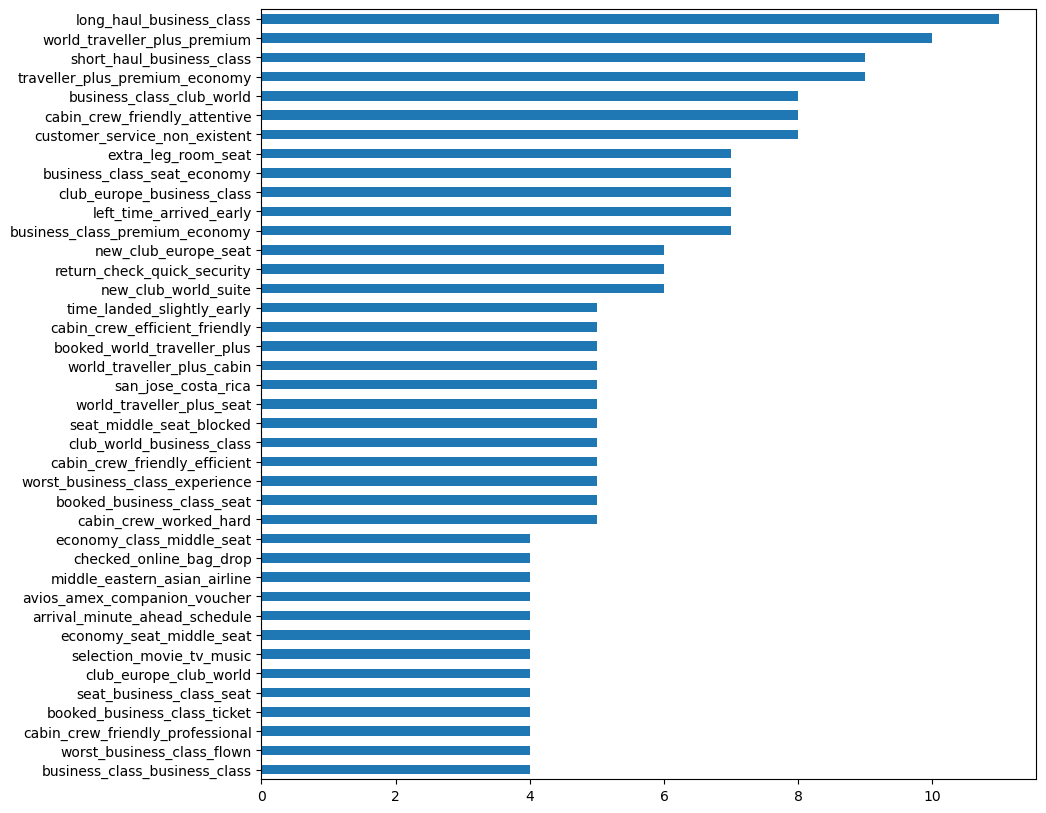

In [65]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams



reviews=" ".join(df.corpus)

#spllit the text of all reviews into of words
words=reviews.split(" ")

new_words=[word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams):
    from nltk import ngrams
    #generate bigrams
    ngrams=ngrams(new_words,number_of_ngrams)

    #creating a freqdist
    ngrams_fd=FreqDist(ngrams).most_common(40)

    #sort values by highest frequency
    ngrams_sorted={k:v for k,v in sorted(ngrams_fd,key=lambda item:item[1])}

    #join bigram tokens with "_"+ maintain sorting
    ngram_joined={'_'.join(k):v for k,v in sorted(ngrams_fd,key=lambda item:item[1])}

    #convert to pamdas series for easy plotting
    ngram_freqdist=pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax=ngram_freqdist.plot(kind="barh")
    return ax

get_freq_dist(new_words,4)

we can see that there are very common positive terms regarding cabin crew.for example, 'cabin_crew_friendly_helpful','cabin_crew_friendly_attentive'etc so certainly customers are providing good reviews about cabin crew staff of british airways.

howeverr,there is one another appproch that we can try to find the word frequencies which will give us better idea.we will group the reviews based on reviews based on rating .say ,we can assume ratings 1-3 are bad reviews ,4-6 are average/good experience and 7-10 indicates a greate experience

In [66]:
ratings_1_3=df[df.stars.isin([1,2,3])]
ratings_4_6=df[df.stars.isin([4,5,6])]
ratings_7_10=df[df.stars.isin([7,8,9,10])]


<Axes: >

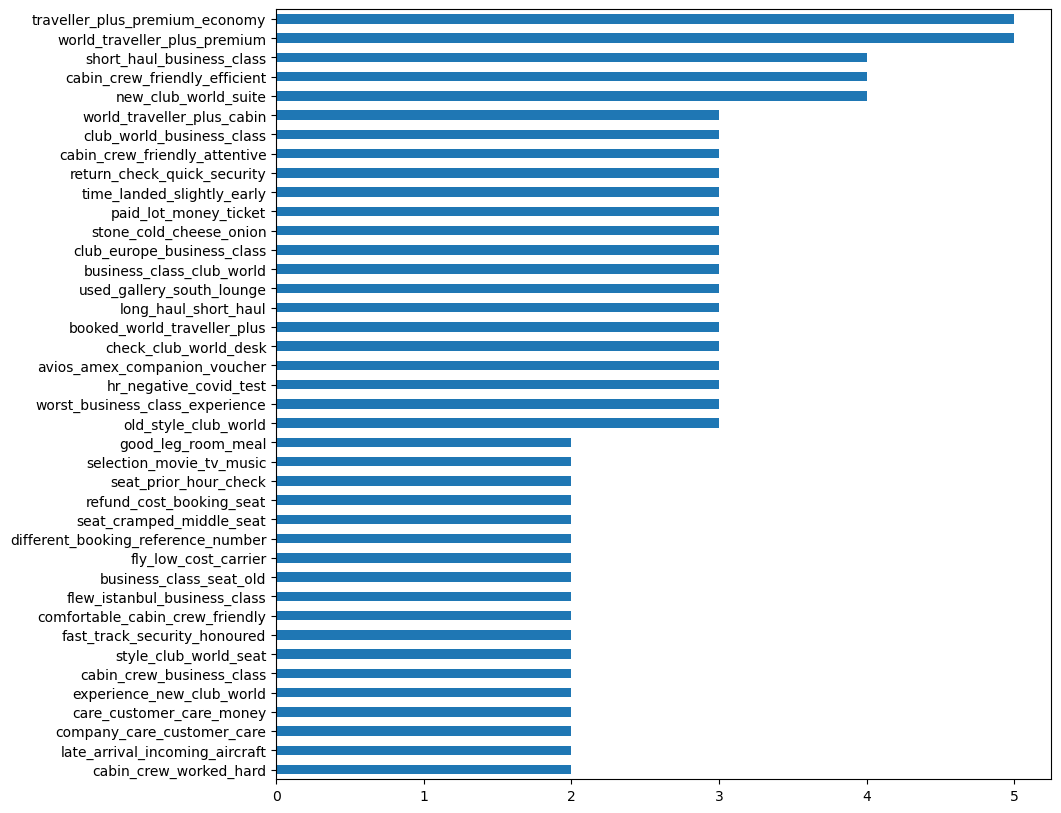

In [67]:
reviews_1_3=" ".join(ratings_1_3.corpus)
reviews_4_6=" ".join(ratings_4_6.corpus)
reviews_7_10=" ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3=reviews_1_3.split(" ")
words_4_6=reviews_4_6.split(" ")
words_7_10=reviews_7_10.split(" ")

new_words_7_10=[word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

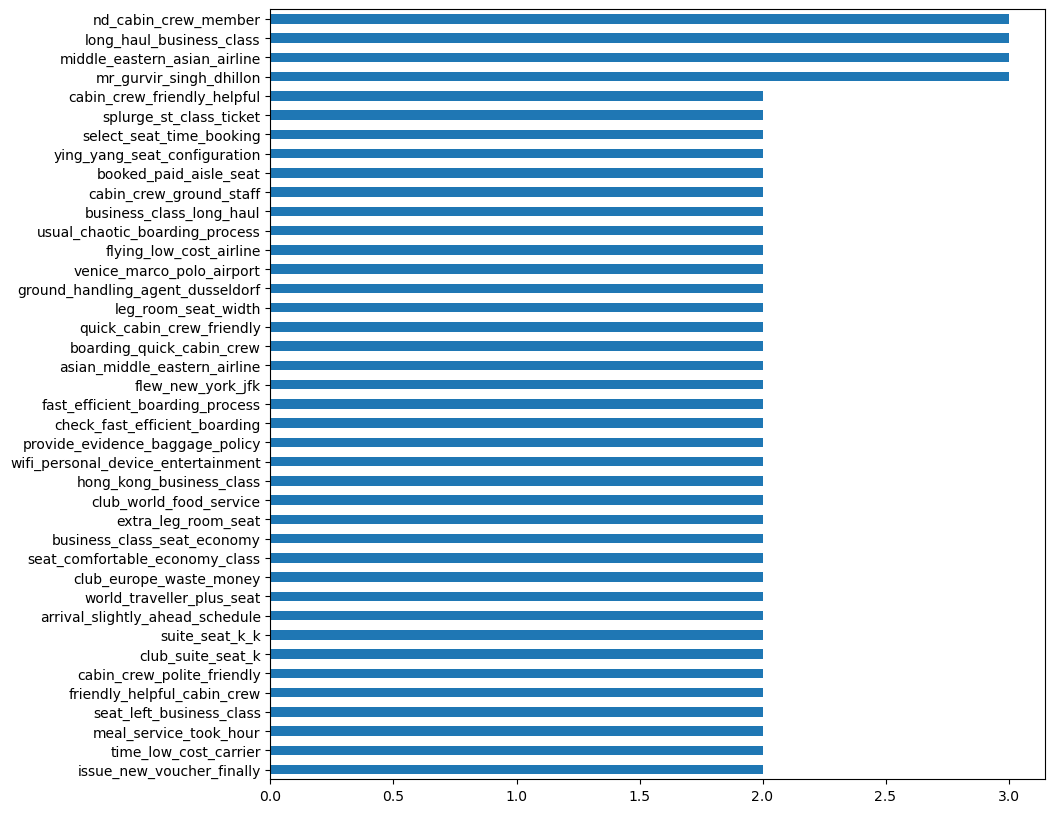

In [68]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

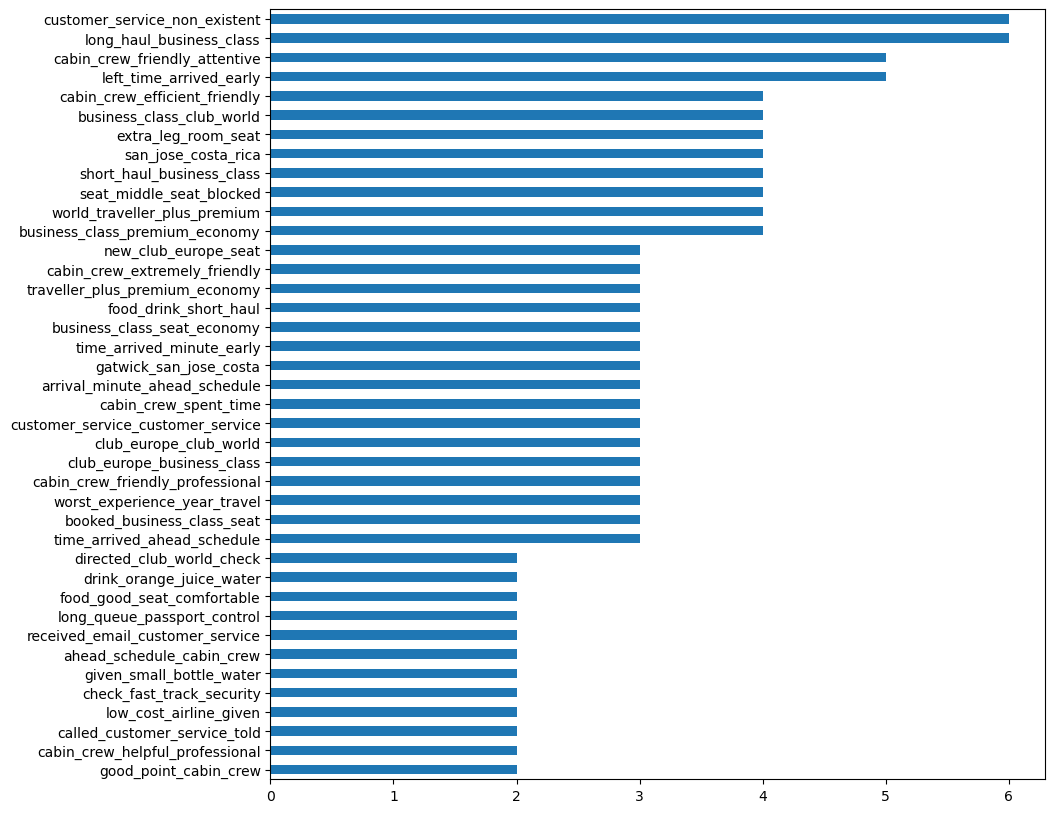

In [69]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

Now we will use textblob library to define if the text is negative or positive and to what extent

In [ ]:
pip install textblob


In [71]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [72]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2425 number of reviews between -0.2 and 0.2 polarity score
1434 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

In [73]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\visnu
[nltk_data]     srithar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [74]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

In [75]:
df.label.value_counts()

label
 1    2165
-1    1210
 0     124
Name: count, dtype: int64

Topic Modeling with LDA

We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.

In [76]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [77]:
from sklearn.utils.validation import check_X_y, check_array


In [ ]:

pip install --upgrade scikit-learn


In [78]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [79]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0          seat          2070.9        flight           877.0        flight   
1            ba           998.2       service           769.3          good   
2         class           731.6            ba           601.7          crew   
3      business           695.5       british           592.8          time   
4        flight           598.8        airway           586.8         cabin   
5       service           432.9          crew           520.5          food   
6          food           361.6         first           501.5            ba   
7         cabin           361.4         cabin           486.1          seat   
8       airline           300.5          food           482.8        lounge   
9           one           281.3          meal           479.4       service   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0          1683.6        flight           106.7        flight          3228.9   
1          1316.8       airline            34.8            ba          1359.4   
2          1012.6            ba            26.1          hour           960.4   
3           819.9           air            22.3        london           677.8   
4           758.2          hour            17.9         check           634.7   
5           758.0           one            16.3          time           594.0   
6           724.3      customer            16.0      heathrow           505.4   
7           712.0      verified            15.5        airway           471.7   
8           696.2          time            13.9       british           466.9   
9           646.5         fault            13.8       service           466.6   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0        flight           333.9      customer           447.9       economy   
1          seat           222.3            ba           396.2          seat   
2            ba           221.8        flight           348.6        flight   
3         cabin           136.3           day           347.8            ba   
4           one           126.8       british           333.2       airline   
5          food           109.5        airway           327.2         class   
6           get           103.7          call           323.0        airway   
7          back           103.5       service           287.6       british   
8          time           100.5          told           270.6      business   
9        screen            95.0        refund           249.1          food   

  Topic 7 weights  
0           643.1  
1           606.8  
2           493.4  
3           472.3  
4           415.5  
5           385.9  
6           382.2  
7           380.3  
8           318.1  
9           316.5

There are certain words that are not useful to detect the tone of the reviews overall like "britsh airways", "passenger", "flight", etc.

Topic modeling with NMF

In [80]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.05115671, 0.03688668],
       [0.01170639, 0.14265432],
       [0.05276486, 0.01729314],
       ...,
       [0.06906292, 0.04972929],
       [0.08069155, 0.02532075],
       [0.13966561, 0.        ]])

In [81]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [82]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0          seat            22.3        flight            22.0
1            ba            13.1            ba             7.4
2         class            10.4          hour             5.2
3      business             8.2          time             4.0
4       service             8.2        london             3.7
5          food             8.1       british             3.7
6         cabin             7.9        airway             3.6
7          crew             7.4       service             3.4
8          good             7.2         would             3.2
9       economy             6.1           day             2.9

With NMF algorithm as well we see there are few words that are not conclusive like "seat". So we will remove such words from the list and try topic modeling again.